In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Source (Data processed by Yamac Eren Ay)
# https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

# Adapted from Cansin H. Cakir's code and analysis
# https://www.kaggle.com/mindus/spotify-descriptive-and-exploratory-data-analysis

# Import spotify data
spotify_data = pd.read_csv('data.csv')
spotify_genre = pd.read_csv('data_by_genres.csv')

#### How does song loudness affect popularity?

Louder songs (those higher than -10 dB) are almost always highly popular. By contrast, there are many quieter songs (those lower than -30 dB) that are not highly popular.

<ipython-input-2-45300582e61c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["interval"] = pd.cut(spotify_data["loudness"],np.arange(-60,0,0.01))


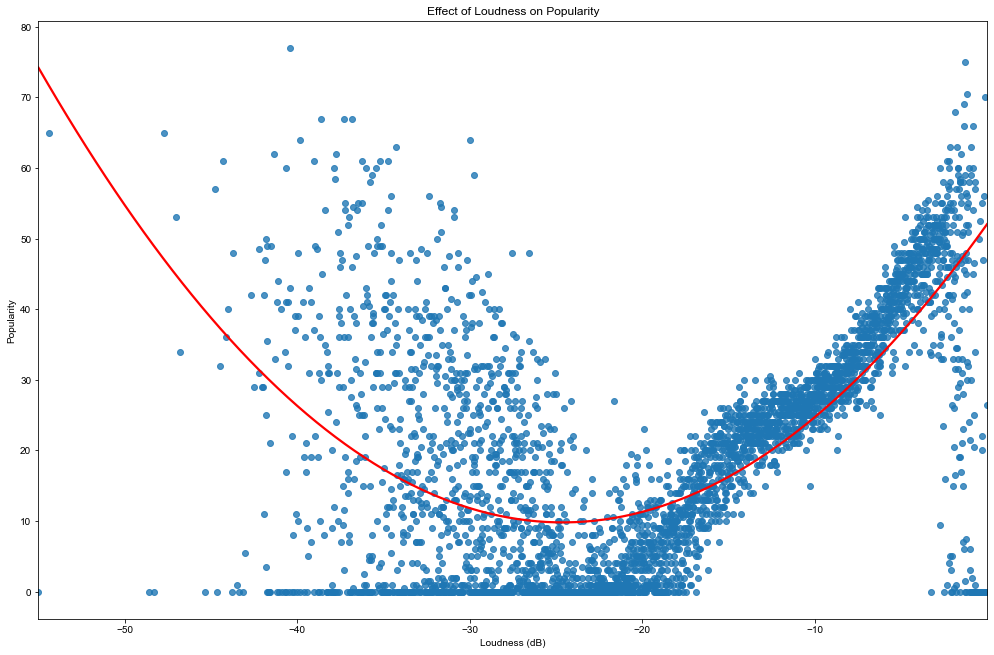

In [2]:
fig, ax = plt.subplots(figsize=(17, 11))
df2 = spotify_data[["loudness","popularity"]]

# Reduce density of data points
# Cut the dataset into intervals of 6000, grouped by median
df2["interval"] = pd.cut(spotify_data["loudness"],np.arange(-60,0,0.01))
df2 = df2.groupby("interval").median()

# Change the color of the line. Source:
# https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot
sns.regplot(data=df2, x = "loudness", y = "popularity", order = 2, ci=None, line_kws={"color": "red"}).set(title = 'Effect of Loudness on Popularity', xlabel = 'Loudness (dB)', ylabel = 'Popularity')
sns.set(font_scale=1.5)

#### How does song loudness change over the years?

Songs generally have become louder over time.

<ipython-input-3-830614284eb3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["interval"] = pd.cut(spotify_data["loudness"],np.arange(-60,0,0.005))


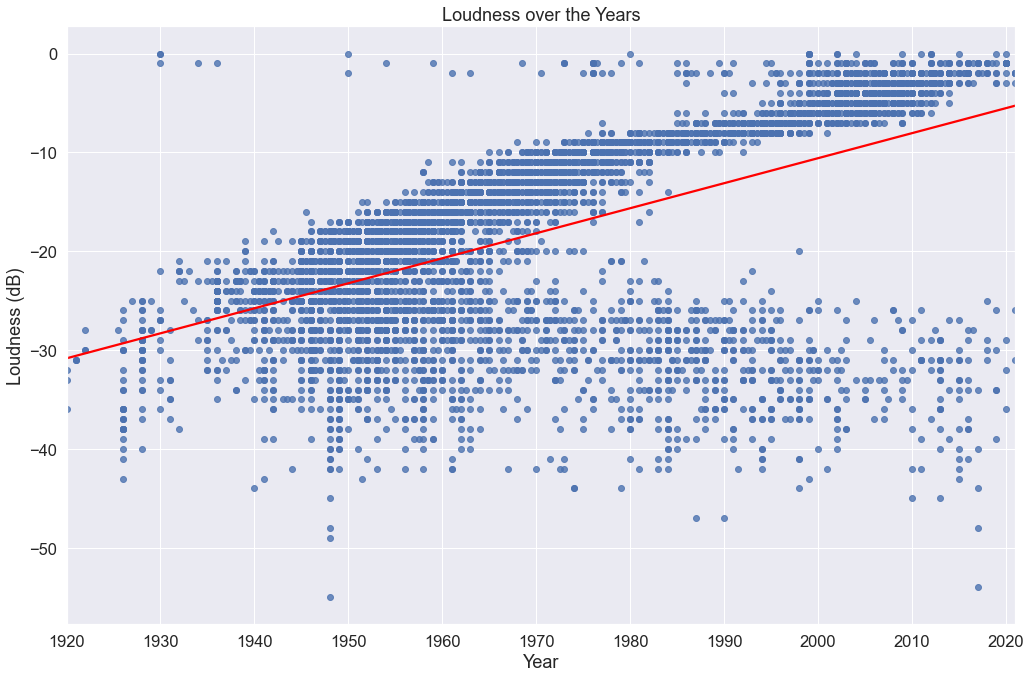

In [3]:
fig, ax = plt.subplots(figsize=(17, 11))
df3 = spotify_data[["year","loudness"]]

# Reduce density of data points
# Cut the dataset into intervals of 12000, grouped by median
df3["interval"] = pd.cut(spotify_data["loudness"],np.arange(-60,0,0.005))
df3 = df3.groupby("interval").median()
df3.loudness = df3.loudness.round(0)

sns.regplot(data=df3, x = "year", y = "loudness", ci=None, line_kws={"color": "red"}).set(title = 'Loudness over the Years', xlabel = 'Year', ylabel = 'Loudness (dB)')
ax.xaxis.set_ticks(np.arange(1920, 2021, 10))
sns.set(font_scale=1.5)

Yearly averages of song loudness similarly increase over time.

In the 2010s, average song loudness has slightly decreased; however, this decrease is not sufficient for claiming an end to the loudness war.

NameError: name 'make_interp_spline' is not defined

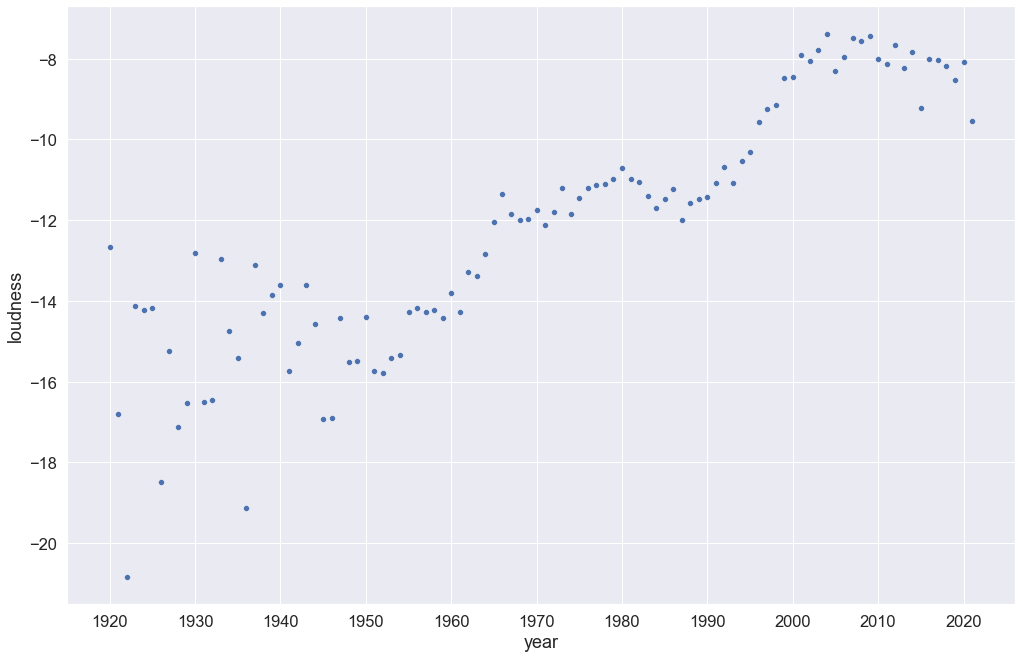

In [4]:
fig, ax = plt.subplots(figsize=(17, 11))

spotify_year = spotify_data.groupby(spotify_data['year']).mean()

sns.scatterplot(data = spotify_year, x = spotify_year.index, y = 'loudness')
ax.xaxis.set_ticks(np.arange(1920, 2021, 10))

# Create smooth curve
# https://www.statology.org/matplotlib-smooth-curve/
spl = make_interp_spline(spotify_year.index, spotify_year.loudness, k = 3)
x_smooth = np.linspace(spotify_year.index.min(), spotify_year.index.max(), 500)
y_smooth = spl(x_smooth)
ax.plot(x_smooth, y_smooth)

sns.set(font_scale=1.5)
ax.set_xlabel('Years')
ax.set_ylabel('Loudness (dB)')
ax.set_title('Average Loudness Over the Years')

#### How loud are various music genres?



I have examined 6 common music genres: Pop, indie, rock, hip-hop, metal and classical.

Popular music genres tend to be loud in similar ways. Pop, indie and rock music each have median loudness of around -8.4 dB.

Metal is the loudest genre, with a median loudness of -6.64 dB. Classical music is the quietest genre, with a median loudness of -21.3 dB.

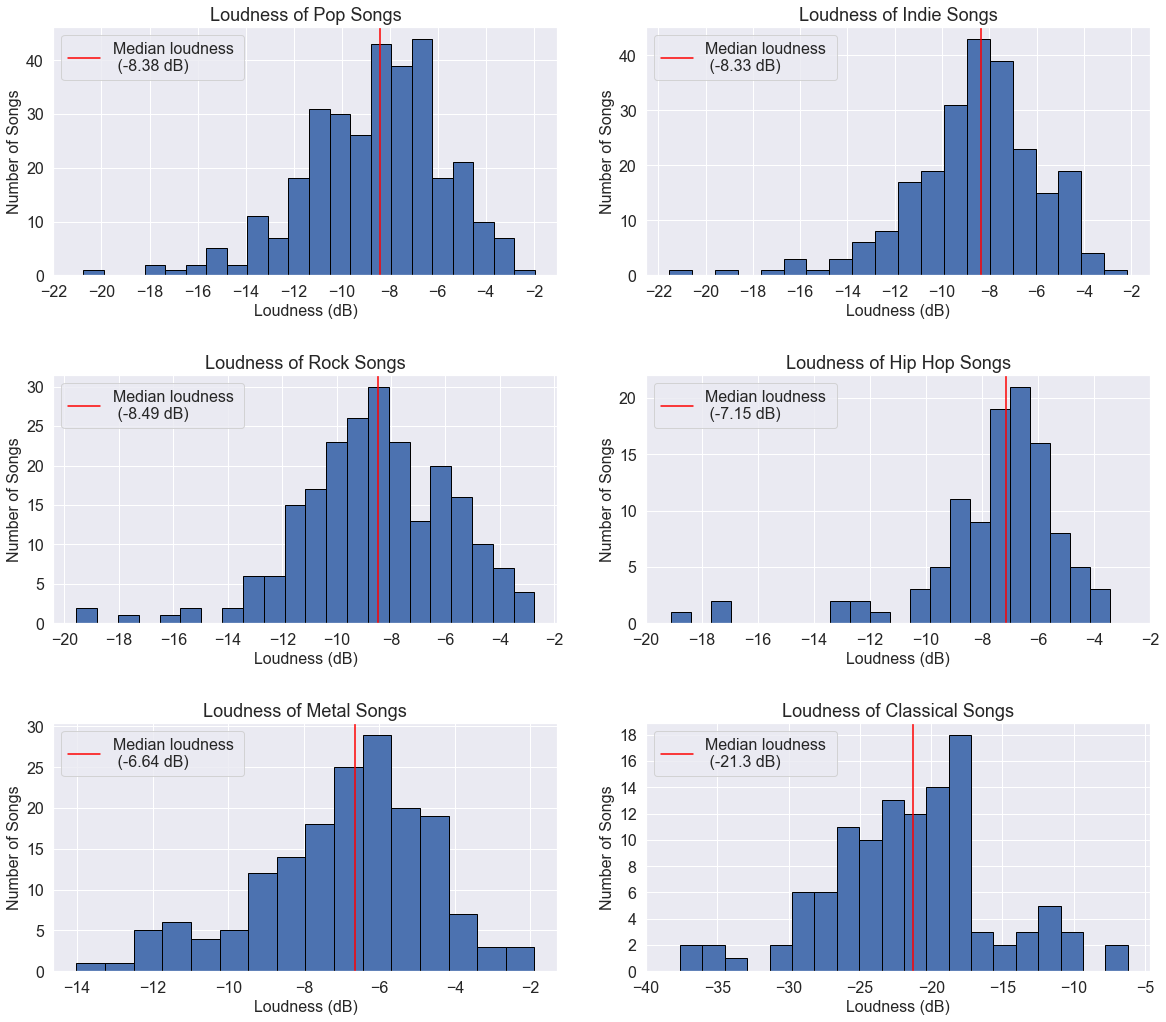

In [6]:
fig, axes = plt.subplots(3,2, figsize=(17, 15))

# Pop music
spotify_genre_pop = spotify_genre[spotify_genre["genres"].str.contains("pop")]
pop_median = spotify_genre_pop.loudness.median()
axes[0, 0].hist(spotify_genre_pop.loudness, bins = 22, edgecolor = "black")
axes[0, 0].axvline(pop_median, color = 'red', label = 'Median loudness \n (-8.38 dB)')
axes[0, 0].set_title('Loudness of Pop Songs')
axes[0, 0].xaxis.set_ticks(np.arange(-22, 0, 2))

# Indie music
spotify_genre_indie = spotify_genre[spotify_genre["genres"].str.contains("indie")]
indie_median = spotify_genre_indie.loudness.median()
axes[0, 1].hist(spotify_genre_indie.loudness, bins = 20, edgecolor = "black")
axes[0, 1].axvline(indie_median, color = 'red', label = 'Median loudness \n (-8.33 dB) ')
axes[0, 1].set_title('Loudness of Indie Songs')
axes[0, 1].xaxis.set_ticks(np.arange(-22, 0, 2))

# Rock music
spotify_genre_rock = spotify_genre[spotify_genre["genres"].str.contains("rock")]
rock_median = spotify_genre_rock.loudness.median()
axes[1, 0].hist(spotify_genre_rock.loudness, bins = 22, edgecolor = "black")
axes[1, 0].axvline(rock_median, color = 'red', label = 'Median loudness \n (-8.49 dB)')
axes[1, 0].set_title('Loudness of Rock Songs')
axes[1, 0].xaxis.set_ticks(np.arange(-20, 0, 2))

# Hip-hop music
spotify_genre_hiphop = spotify_genre[spotify_genre["genres"].str.contains("hip hop")]
hiphop_median = spotify_genre_hiphop.loudness.median()
axes[1, 1].hist(spotify_genre_hiphop.loudness, bins = 22, edgecolor = "black")
axes[1, 1].axvline(hiphop_median, color = 'red', label = 'Median loudness \n (-7.15 dB)')
axes[1, 1].set_title('Loudness of Hip Hop Songs')
axes[1, 1].xaxis.set_ticks(np.arange(-20, 0, 2))

# Metal music
spotify_genre_metal = spotify_genre[spotify_genre["genres"].str.contains("metal")]
metal_median = spotify_genre_metal.loudness.median()
axes[2, 0].hist(spotify_genre_metal.loudness, bins = 16, edgecolor = "black")
axes[2, 0].axvline(metal_median, color = 'red', label = 'Median loudness \n (-6.64 dB)')
axes[2, 0].set_title('Loudness of Metal Songs')

# Classical music
spotify_genre_classical = spotify_genre[spotify_genre["genres"].str.contains("classical")]
classical_median = spotify_genre_classical.loudness.median()
axes[2, 1].hist(spotify_genre_classical.loudness, bins = 20, edgecolor = "black")
axes[2, 1].axvline(classical_median, color = 'red', label = 'Median loudness \n (-21.3 dB)')
axes[2, 1].set_title('Loudness of Classical Songs')
axes[2, 1].xaxis.set_ticks(np.arange(-40, 0, 5))
axes[2, 1].yaxis.set_ticks(np.arange(0, 20, 2))

# Add labels and legend for every plot
# Resize fonts (Title, x-axis, y-axis, etc.)
# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list#20289530
for ax in axes.reshape(-1):
    ax.set_xlabel('Loudness (dB)')
    ax.set_ylabel('Number of Songs')
    ax.legend(loc="upper left", prop={"size":16})
    ax.title.set_size(18)
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

# How I put more whitespace around my plots
# https://stackoverflow.com/questions/14306986/how-to-put-more-whitespace-around-my-plots#14307273
fig.tight_layout(pad=2)